# Abalone Case Study

Problem Statement: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.


# Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone.

# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Loading the data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# Clearly, the dataset has 4177 rows and 9 columns
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
# clearly, there is no null-value
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

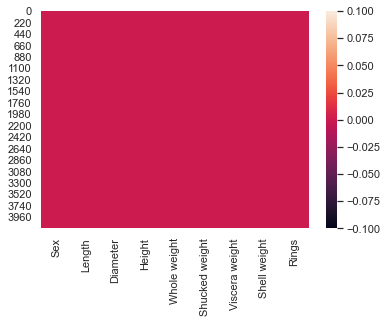

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.shape

(4177, 9)

# SUMMARY STATISTICS

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


observations:
    Here, nothing we can find out nothing abt outliers and skewness so we have to check by boxplot

# To Check correlation

In [12]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

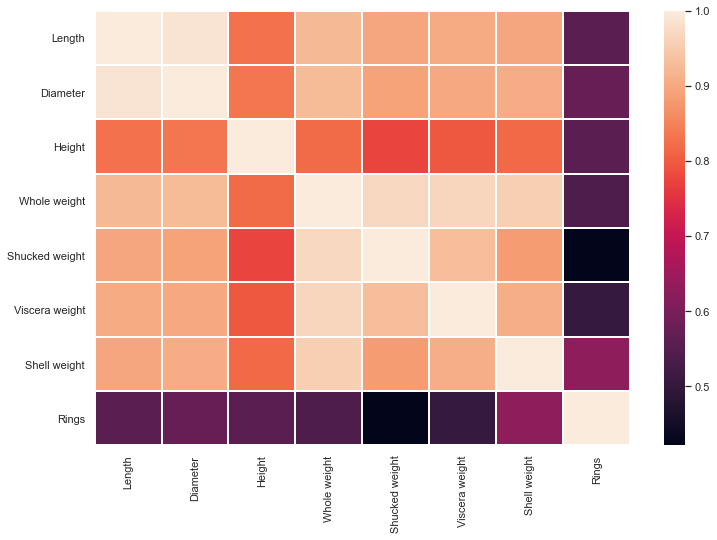

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,linewidths=1)

Observations

<AxesSubplot:>

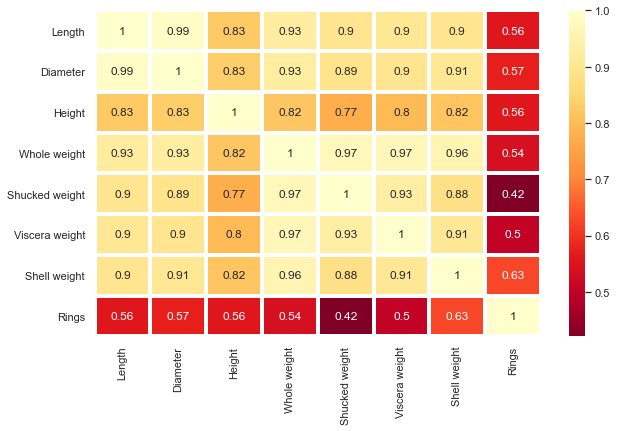

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True,linewidths=3)

# Univariate analysis

# To check Skewness

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

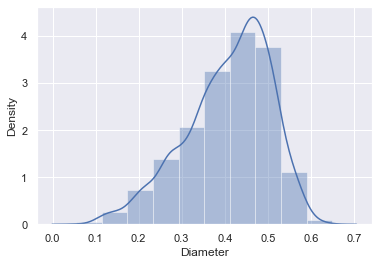

In [15]:
#little bit of skeweness
sns.distplot(df['Diameter'],bins=10)

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

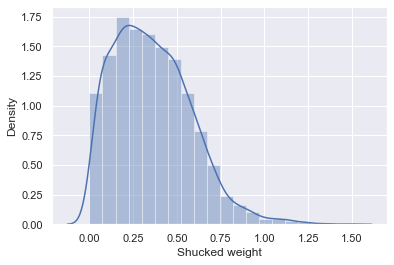

In [16]:
# skewed data
sns.distplot(df['Shucked weight'],bins=20)

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

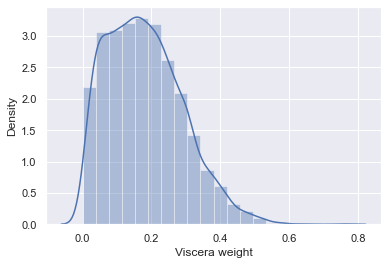

In [17]:
# little bit of skeweness
sns.distplot(df['Viscera weight'],bins=20)

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

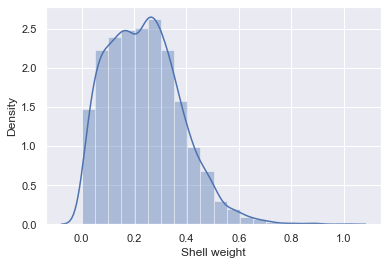

In [18]:
# little bit of skeweness
sns.distplot(df['Shell weight'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

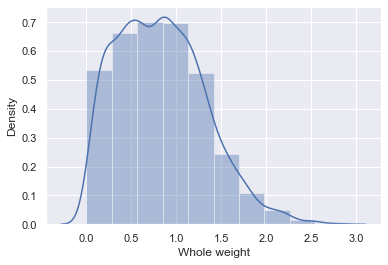

In [19]:
sns.distplot(df['Whole weight'],bins=10)

In [20]:
collist=df.columns.values
ncol=8
nrows=10

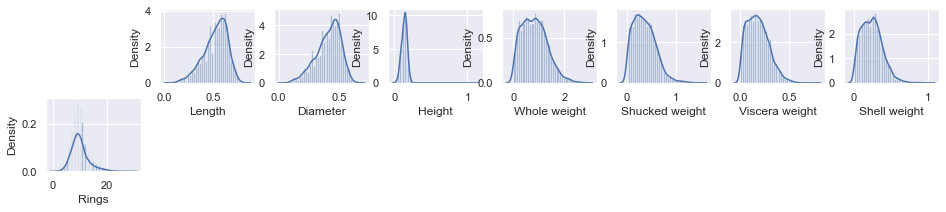

In [21]:
# plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

<AxesSubplot:xlabel='Sex', ylabel='count'>

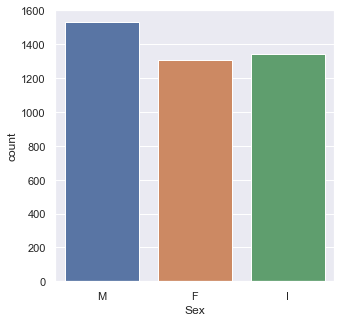

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(df["Sex"])

Observations

# To check outliers by boxplot

<AxesSubplot:>

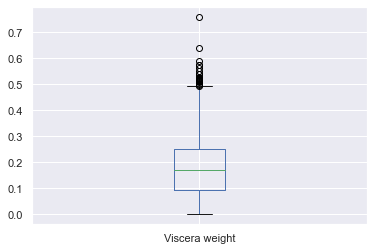

In [23]:
# outliers are present here in this column
df['Viscera weight'].plot.box()

<AxesSubplot:>

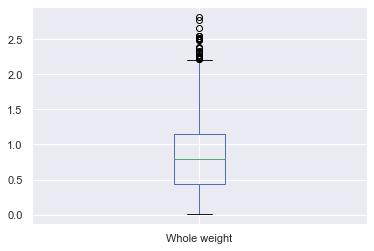

In [24]:
# outliers are present here in this column
df['Whole weight'].plot.box()

<AxesSubplot:>

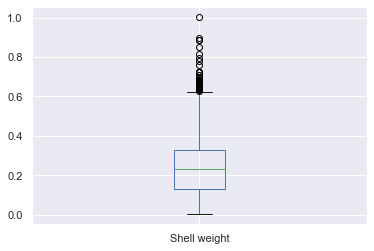

In [25]:
# outliers are present here in this column
df['Shell weight'].plot.box()

<AxesSubplot:>

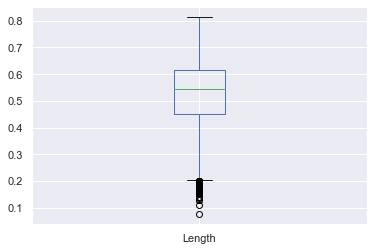

In [26]:
# outliers are present here in this column
df['Length'].plot.box()

<AxesSubplot:>

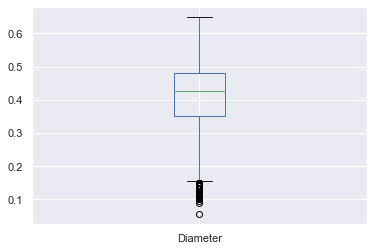

In [27]:
# outliers are present here in this column
df['Diameter'].plot.box()

In [28]:
collist=df.columns.values
ncol=8
nrows=10

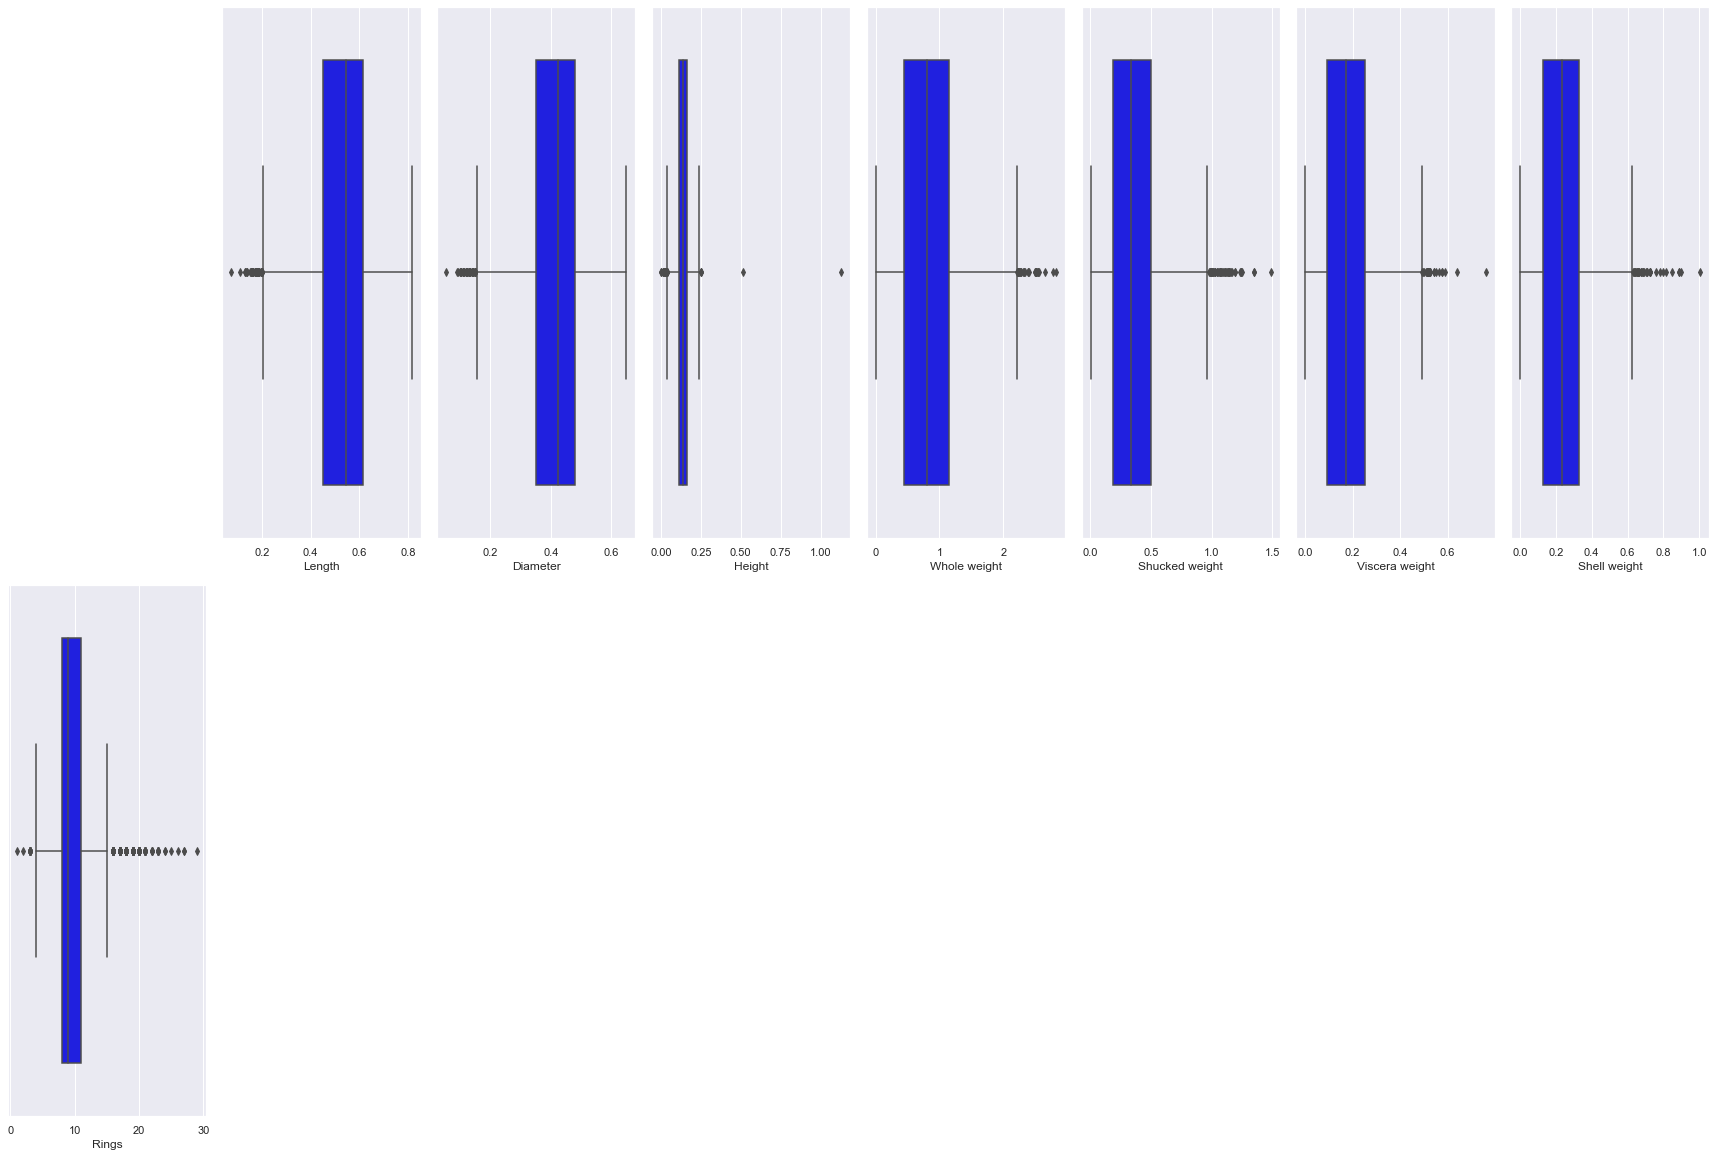

In [29]:
plt.figure(figsize=(3*ncol,10*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Rings', ylabel='count'>

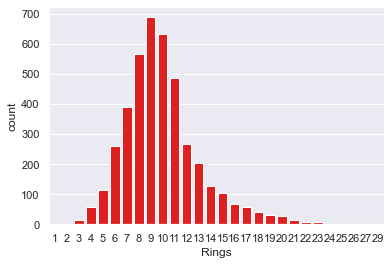

In [30]:
sns.countplot(x='Rings',data=df,color='Red')

Observations

# Bivariate analysis

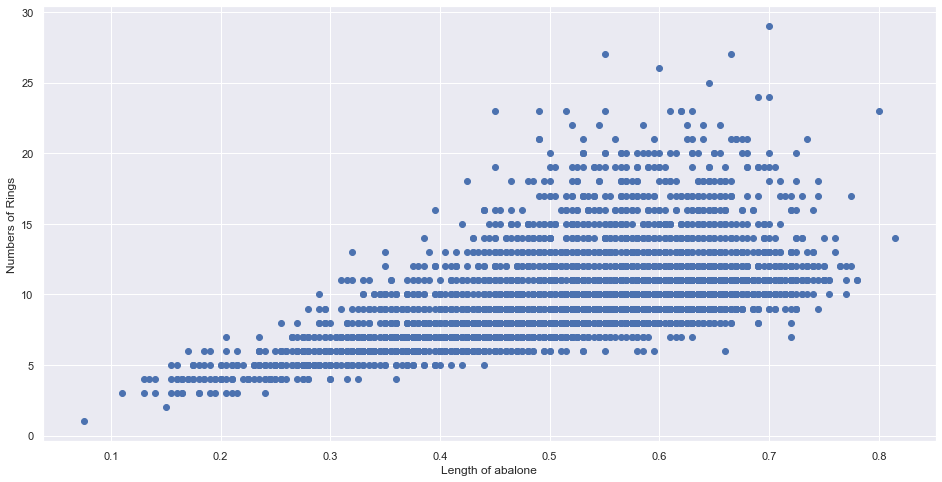

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(data=df,x='Length',y='Rings')
plt.xlabel('Length of abalone')
plt.ylabel('Numbers of Rings')
plt.show()

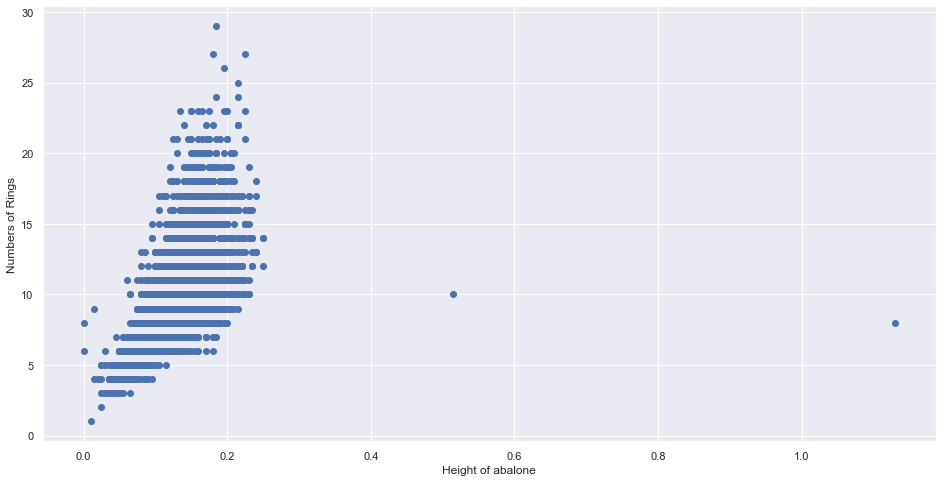

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(data=df,x='Height',y='Rings')
plt.xlabel('Height of abalone')
plt.ylabel('Numbers of Rings')
plt.show()

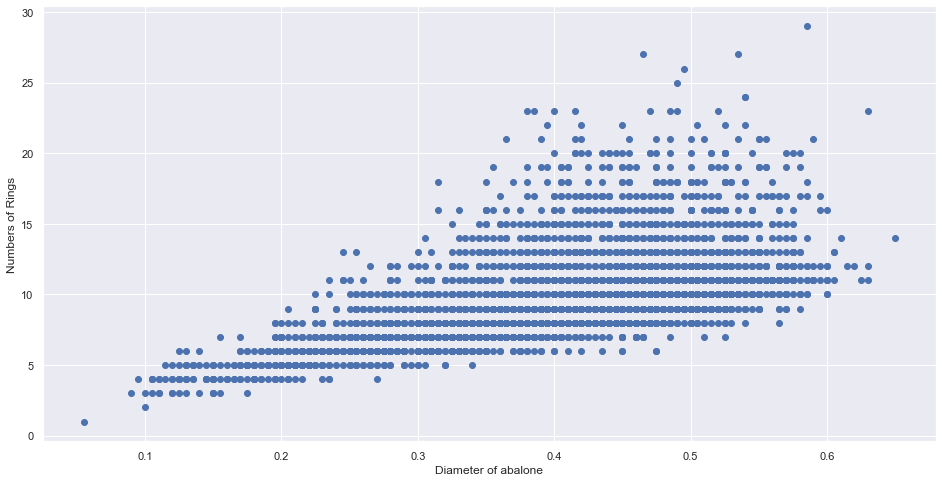

In [33]:
plt.figure(figsize=(16,8))
plt.scatter(data=df,x='Diameter',y='Rings')
plt.xlabel('Diameter of abalone')
plt.ylabel('Numbers of Rings')
plt.show()

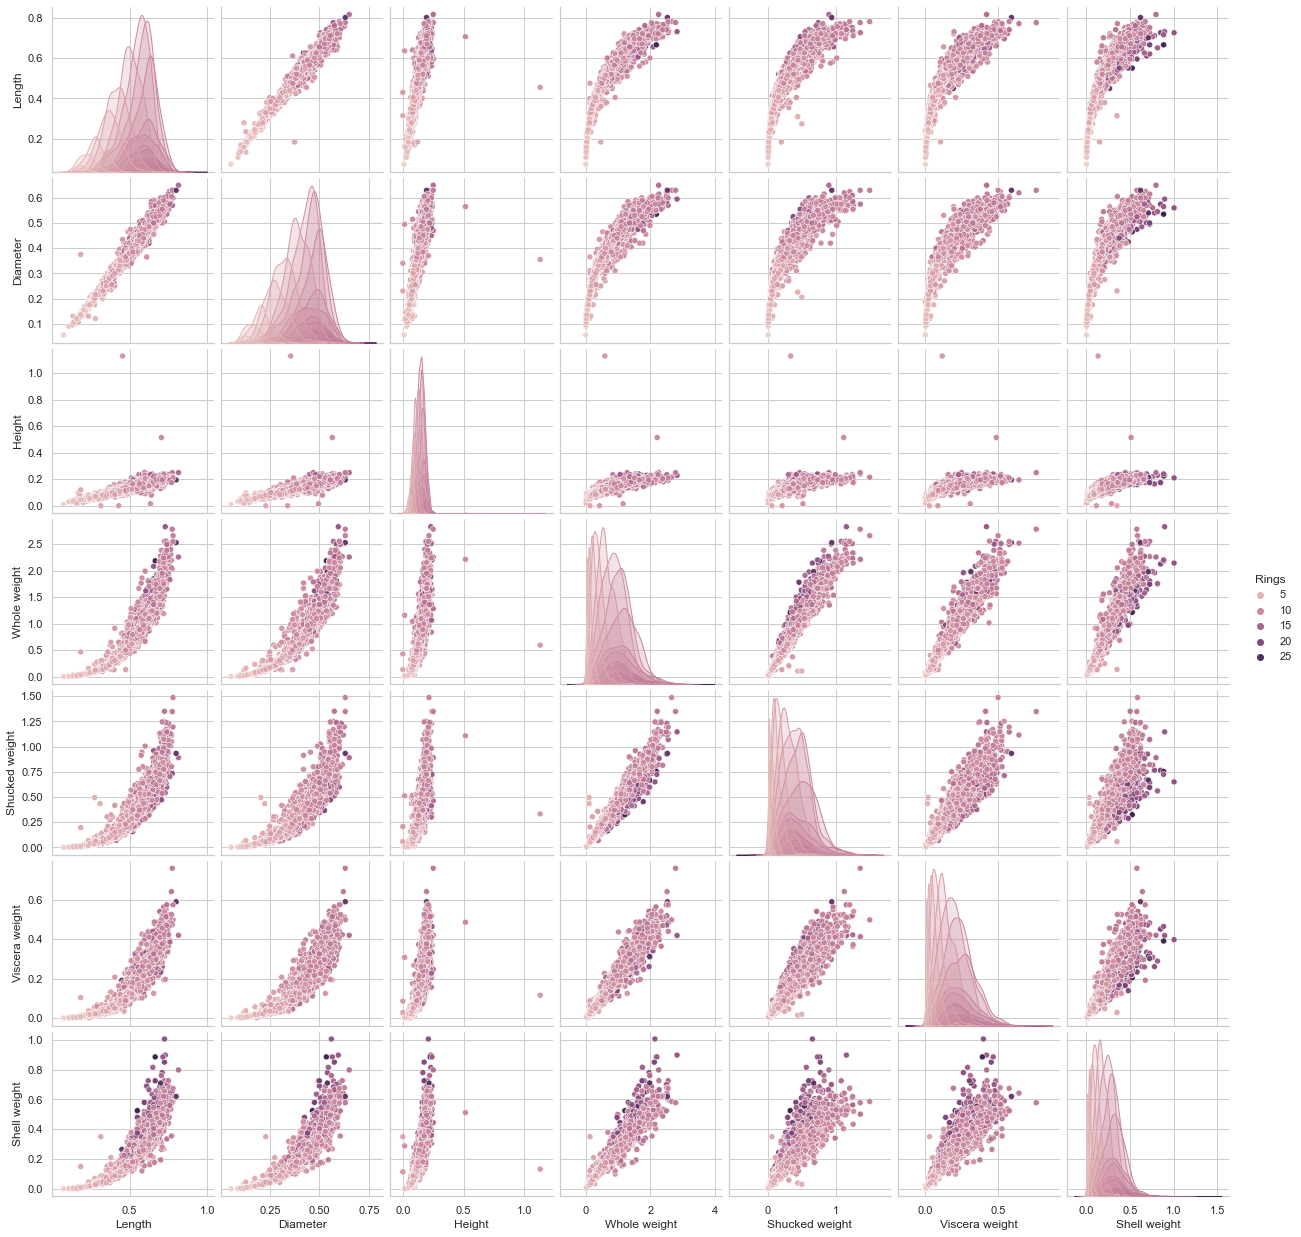

In [34]:
sns.set(style='whitegrid')
sns.pairplot(df,hue='Rings')
plt.show()

# One-hot Encoding

As, Sex column is a string datatype , Applying One-hot encoding to convert into numeric value

In [35]:
dummies=pd.get_dummies(df['Sex'])
dummies

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [36]:
# Adding encoded sex column in the dataset
df=pd.concat([df,dummies],axis=1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [37]:
# Dropping Sex column from the df dataset, as encoded sex column is already added
df=df.drop('Sex',axis=1)

In [38]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


# Removing Outliers

In [39]:
# Applying z-score
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.67483383, 0.68801788,
        1.31667716],
       [1.44898585, 1.439929  , 1.18397831, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.05003309, 0.12213032, 0.10799087, ..., 1.48184628, 0.68801788,
        0.75948762],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.84118198, 0.77718745, 0.25067161, ..., 1.48184628, 0.68801788,
        0.75948762],
       [1.54905203, 1.48263359, 1.32665906, ..., 0.67483383, 0.68801788,
        1.31667716]])

In [40]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

Now, you can see the example where outliers are present. Here are the few examples

In [41]:
z[6][7]

3.12251641377204

In [42]:
z[4148][5]

3.151485732766359

In [43]:
z[129][6]

3.888100233031821

In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
# Our new dataset where all all the outliers have been removed
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [46]:
df_new.shape

(4027, 11)

In [47]:
df_new.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
F                 0.821149
I                 0.731618
M                 0.576507
dtype: float64

In [48]:
y = df_new.Rings
x = df_new.drop('Rings',axis=1)

In [49]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [50]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

# Exploring target variable

In [51]:
df['Rings'].count()

4177

In [52]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [53]:
# 9th Rings has the highest no of counts
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Spliting independent and target variables into x and y train/test using train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)

Scaling x_train and x_test so that all values are of equal size

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
x_train

array([[ 1.02999513,  0.88446966,  0.03592658, ..., -0.65904737,
        -0.69690948,  1.30410916],
       [-1.83396946, -1.72438037, -1.46792244, ..., -0.65904737,
         1.43490659, -0.76680698],
       [-1.70178648, -1.56465485, -1.60463598, ..., -0.65904737,
         1.43490659, -0.76680698],
       ...,
       [-0.64432263, -0.60630178,  0.03592658, ..., -0.65904737,
         1.43490659, -0.76680698],
       [ 0.19283625,  0.29880945,  0.30935367, ...,  1.51734162,
        -0.69690948, -0.76680698],
       [ 0.72156818,  0.88446966,  0.03592658, ..., -0.65904737,
        -0.69690948,  1.30410916]])

In [57]:
y_train

3162    15
177      8
2216     7
2025    10
2132    10
        ..
3575     8
1414     9
570     16
3329    10
1359    10
Name: Rings, Length: 2698, dtype: int64

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.2618510158013544
[[ 0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1 12  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2 10 26 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 22 48 15  5  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  8 46 43 15  4  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 28 70 58 17  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 54 90 64 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12 10 52 58 51  1  4  0  0  1  0  0  0]
 [ 0  0  0  0  4 16 27 53 39  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 16 35 21  0  6  0  0  2  0  0  0]
 [ 0  0  0  1  0  4  5 25 16  0 10  0  0  1  0  0  0]
 [ 0  0  0  0  0  4  3 21 11  0  3  1  0  1  1  0  0]
 [ 0  0  0  0  0  2  4 15  8  2  7  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  9  1  0  5  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  3  7  6  0  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  4  3  1  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  2  0  0  2  0  0  0]]
              precision    recall  f1-score   support

       

We can see that accuracy is 26 prcnt

# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.2016553799849511
[[ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  4  9  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 11 16 10  3  2  1  1  0  0  0  0  0  0  0  0]
 [ 0  1 15 25 20 20  5  3  3  1  0  0  2  0  0  0  0]
 [ 0  0  4 17 37 33 12  6  3  3  2  0  0  0  0  0  0]
 [ 0  0  2  5 34 48 46 24 13  4  3  2  1  0  0  0  1]
 [ 0  0  0  7 17 32 50 61 27 19 12  3  8  3  0  1  0]
 [ 0  0  0  4  4 20 37 35 38 18 14  6  2  6  3  0  2]
 [ 0  0  0  1  8  9 29 26 31 18  8  5  2  0  2  1  1]
 [ 0  0  0  0  2 10 11 17 15  8  8  4  6  1  1  4  0]
 [ 0  0  0  1  0  4  7 10  7 10  8  5  2  3  2  3  0]
 [ 0  0  0  0  0  5 11  5  3  6  3  4  1  2  2  2  1]
 [ 0  0  0  0  0  5  5  8  3  1  9  1  4  0  1  2  0]
 [ 0  0  0  0  0  0  2  1  3  4  2  3  0  3  0  0  0]
 [ 0  0  0  0  0  1  3  5  2  4  0  1  1  1  1  0  0]
 [ 0  0  0  0  0  1  2  5  0  0  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  2  2  0  1  0  1  1  0]]
              precision    recall  f1-score   support

       

We can see that accuracy is 20 prcnt

# RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.24153498871331827
[[ 0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  5  6  8  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 12 21  8  3  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 26 35 20  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 15 43 40 10  7  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  1 35 62 45 27 10  0  1  1  0  0  0  0  0]
 [ 0  0  0  4 14 59 60 73 22  5  2  1  0  0  0  0  0]
 [ 0  0  0  1  6 16 36 63 49  8  4  1  0  2  2  1  0]
 [ 0  0  0  0  6 12 42 35 37  4  4  0  0  0  1  0  0]
 [ 0  0  0  0  2  7 14 25 20  5  9  2  1  0  1  0  1]
 [ 0  0  0  1  1  2  5 18 19  4  6  3  1  2  0  0  0]
 [ 0  0  0  0  0  5  8  9 10  5  4  0  0  2  1  0  1]
 [ 0  0  0  0  0  4  4 12  6  2  7  1  1  2  0  0  0]
 [ 0  0  0  0  0  1  2  4  3  1  2  3  0  1  1  0  0]
 [ 0  0  0  0  0  1  5  3  5  1  3  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  2  3  1  0  2  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  1  0  3  0  1  2  0  2  0  0  0]]
              precision    recall  f1-score   support

      

We can see that accuracy is 24 prcnt

# Support Vector Classifier

In [61]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.2686230248306998
[[ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  9  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8 30 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 26 46  8 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 53 30 18  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 30 63 56 30  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 49 87 79 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  7 48 91 39  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 11 32 65 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 21 42 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  3 12 33 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  9 27  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  8 21  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2 12  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 13  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  3  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

Accuracy is 27prcnt

In [62]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knn.score(x_test,y_test)

0.20993227990970656

In [63]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(x_train,y_train)
gauss.score(x_train,y_train)
gauss.score(x_test,y_test)

0.22573363431151242

In [64]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

Cross validation score of Logistic Regression model : 0.2617372809518672


In [65]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :",scr.mean())

Cross validation score of Decision Tree model : 0.19568608109982583


In [66]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

Cross validation score of Random Forest model : 0.2550347548664519


In [67]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Support vector classifier :",scr.mean())

Cross validation score of Support vector classifier : 0.26248478029684197


# Hyper parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter = {'max_depth':np.arange(2,10),
            'criterion':['gini','entropy'],
            'min_samples_split':[2,3],
            'max_features' : ['auto','random'],
            'min_samples_leaf':[2,3]}

In [75]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'random'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]})

In [77]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [78]:
Final_mod = DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_split = 2, min_samples_leaf = 2)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

26.56132430398796


# Saving the model

In [79]:
import joblib
joblib.dump(Final_mod,"FinalModel.pk1")

['FinalModel.pk1']

# Conclusion

So, Finally we conclude after tuning also our model is not so good. So, we have to try some handling imbalancing problem to make our model better